In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
df=pd.DataFrame()
for i in range(5):
  df['Banner_type_'+str(i)]=np.random.randint(0,2,100000)
df

,Banner_type_0,Banner_type_1,Banner_type_2,Banner_type_3,Banner_type_4
0,1,0,1,1,0
1,0,1,1,1,0
2,0,1,0,0,1
3,0,0,1,0,0
4,1,0,0,0,1
...,...,...,...,...,...
99995,1,0,0,1,1
99996,1,1,0,0,0
99997,0,0,1,1,0
99998,1,1,0,0,1


In [3]:
num_iter=100000
num_banner=5

Number of times a banner was clicked

In [4]:
count= np.zeros(num_banner)

Sum of rewards obtained from each banner

In [5]:
sum_rewards=np.zeros(num_banner)

Mean reward of each banner

In [6]:
Q=np.zeros(num_banner)

Selected banner

In [7]:
selected_banner=[]

## Define the Thompson Sampling method

In [8]:
def thompson_sampling(alpha,beta):
  samples=[np.random.beta(alpha[i]+1,beta[i]+1) for i in range(num_banner)]
  return np.argmax(samples)

## Start pulling the arm

In [9]:
alpha=np.zeros(num_banner)
beta=np.zeros(num_banner)

In [10]:
for i in range(num_iter):
    banner =thompson_sampling(alpha,beta)
    reward=df.values[i,banner]
    count[banner] += 1
    sum_rewards[banner] += reward
    Q[banner] = sum_rewards[banner] / count[banner]
    selected_banner.append(banner)
    if reward==1:
      alpha[banner]=alpha[banner]+1
    else:
      beta[banner]=beta[banner]+1

In [11]:
print(Q)

[0.49967015 0.4887931  0.49533858 0.49912245 0.4979468 ]


In [12]:
print("Optimal banner is ",np.argmax(Q)+1)

Optimal banner is  1


## Plot

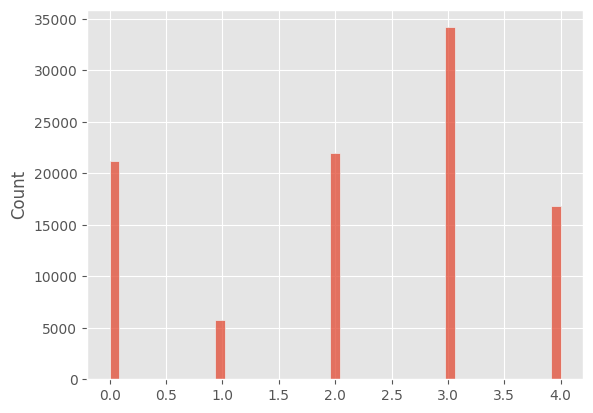

In [13]:
ax=sns.histplot(np.array(selected_banner))
plt.show()